# **DATA VISUALIZATION ASSIGNMENT**




*The given dataset has four columns: date, description, unit, and place . This dataset provides different units to characterise the food availability on this specific date in a specific location.*

# 1. Import Python Modules

*Import each module that will be used to analyse and display the dataset.*

In [103]:
from google.colab import drive

In [104]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [105]:
!pip install pandas-profiling


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns

In [107]:
path='/content/gdrive/MyDrive/Data Visualization Assignment.csv'

In [108]:
df=pd.read_csv(path) #read the dataset

In [109]:
print(df) 

                         DATE DESCRIPTION  UNIT          PLACE
0       Friday, April 1, 2022        Beef   1.0    Kolenchery 
1       Friday, April 1, 2022        Fish   1.0    Kolenchery 
2       Sunday, April 3, 2022        Beef   2.0  Tripunithura 
3      Tuesday, April 5, 2022      Prawns   1.0     Bangalore 
4    Wednesday, April 6, 2022       Dates   1.0      Mangalore
..                        ...         ...   ...            ...
108     Friday, July 15, 2022        Beef   1.0            NaN
109     Friday, July 15, 2022      Prawns   1.0            NaN
110     Friday, July 15, 2022       Lemon   1.0            NaN
111                       NaN         NaN   NaN            NaN
112                       NaN         NaN   NaN            NaN

[113 rows x 4 columns]


#2. Understanding the data

In [110]:
df.head()
#prints the first 5 rows in a dataset

,DATE,DESCRIPTION,UNIT,PLACE
0,"Friday, April 1, 2022",Beef,1.0,Kolenchery
1,"Friday, April 1, 2022",Fish,1.0,Kolenchery
2,"Sunday, April 3, 2022",Beef,2.0,Tripunithura
3,"Tuesday, April 5, 2022",Prawns,1.0,Bangalore
4,"Wednesday, April 6, 2022",Dates,1.0,Mangalore


In [111]:
df.tail()
#prints the last 5 rows in a dataset

,DATE,DESCRIPTION,UNIT,PLACE
108,"Friday, July 15, 2022",Beef,1.0,NaN
109,"Friday, July 15, 2022",Prawns,1.0,NaN
110,"Friday, July 15, 2022",Lemon,1.0,NaN
111,NaN,NaN,NaN,NaN
112,NaN,NaN,NaN,NaN


In [112]:
df.describe() 
#it returns description of the data in the DataFrame.

,UNIT
count,111.000000
mean,1.720721
std,1.088545
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,6.000000


In [113]:
df.shape
#it returns number of rows and columns

(113, 4)

In [114]:
df.columns

Index(['DATE', 'DESCRIPTION', 'UNIT', 'PLACE'], dtype='object')

In [115]:
df.nunique()   #it prints the unique values in our data set

DATE           36
DESCRIPTION     9
UNIT            6
PLACE          33
dtype: int64

In [116]:
df.info()
#provides necessary information about the given dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         111 non-null    object 
 1   DESCRIPTION  111 non-null    object 
 2   UNIT         111 non-null    float64
 3   PLACE        103 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.7+ KB


# 3. Cleaning the data


In [117]:
df['DESCRIPTION'].value_counts()
#it provides the no of values of each column in dataset.

Beef         32
Prawns       31
Fish         13
Mango        10
Lemon         9
King Fish     7
Dryfruits     5
Dates         3
Kadumanga     1
Name: DESCRIPTION, dtype: int64

In [118]:
df['DATE'].value_counts()

Thursday, May 19, 2022       10
Thursday, April 21, 2022      9
Tuesday, June 21, 2022        7
Wednesday, April 20, 2022     6
Friday, May 13, 2022          5
Tuesday, May 17, 2022         5
Tuesday, April 19, 2022       5
Tuesday, May 3, 2022          5
Tuesday, July 5, 2022         4
Tuesday, June 28, 2022        4
Thursday, April 7, 2022       4
Wednesday, June 1, 2022       4
Friday, April 22, 2022        4
Saturday, May 7, 2022         4
Saturday, May 28, 2022        3
Friday, July 15, 2022         3
Friday, April 8, 2022         3
Sunday, April 10, 2022        3
Thursday, June 9, 2022        2
Monday, May 30, 2022          2
Sunday, June 5, 2022          2
Friday, April 1, 2022         2
Friday, April 15, 2022        2
Monday, April 11, 2022        1
Friday, May 27, 2022          1
Tuesday, May 31, 2022         1
Monday, May 16, 2022          1
Friday, May 20, 2022          1
Saturday, June 18, 2022       1
Sunday, April 3, 2022         1
Thursday, June 23, 2022       1
Sunday, 

In [120]:
df['UNIT'].value_counts()

1.0    63
2.0    31
3.0     7
4.0     7
6.0     2
5.0     1
Name: UNIT, dtype: int64

In [121]:
df['PLACE'].value_counts()

Malappuram                  10
Noida - UP                   6
Eloor                        6
Kottayam                     6
Mumbai                       6
United States                5
Kochi                        5
To Kottayam                  5
Eroor - Vytila               5
Pathanamthitta               4
Nettoor                      4
Bangalore to US              4
Kadavanthra                  3
Tripunithura                 3
Kolenchery                   3
Vazhakala                    3
Pune                         3
Kanjiramttom                 2
Jabalpur - Madhyapradesh     2
Chennai                      2
Kumily                       2
Mangalore - Ullal            2
Kakkanad                     2
Thrissur/ Guruvayoor         1
Bangalore                    1
malappuram                   1
Bangalore                    1
Mangalore                    1
Aroor                        1
Tripunithurra                1
Tripunithura                 1
Padappai- Tamilnadu          1
kadavant

# 3.1 Checking the missing values in given dataset

*Using the functions isnull() and notnull, we can verify whether a dataframe has any missing values (). Both functions aid in determining whether or not a value is NaN. To find null values in a series, these functions can also be used with Pandas Series.*

In [122]:
df.isnull().sum()

DATE            2
DESCRIPTION     2
UNIT            2
PLACE          10
dtype: int64

# 3.2 Using dropna() function

*Drop the last few columns as they are null and drop last two rows as they are completely null  to make data more efficient instead of filling or replacing them.*



In [123]:
df1=df.dropna(how="any") 
print(df1)

                         DATE DESCRIPTION  UNIT          PLACE
0       Friday, April 1, 2022        Beef   1.0    Kolenchery 
1       Friday, April 1, 2022        Fish   1.0    Kolenchery 
2       Sunday, April 3, 2022        Beef   2.0  Tripunithura 
3      Tuesday, April 5, 2022      Prawns   1.0     Bangalore 
4    Wednesday, April 6, 2022       Dates   1.0      Mangalore
..                        ...         ...   ...            ...
98      Sunday, June 26, 2022      Prawns   1.0          Kochi
99     Tuesday, June 28, 2022      Prawns   4.0       Kottayam
100    Tuesday, June 28, 2022        Fish   3.0       Kottayam
101    Tuesday, June 28, 2022   King Fish   1.0       Kottayam
102    Tuesday, June 28, 2022        Beef   4.0       Kottayam

[103 rows x 4 columns]


In [124]:
df1.isnull().sum()

DATE           0
DESCRIPTION    0
UNIT           0
PLACE          0
dtype: int64

# 4.Relationship Analysis

In [125]:
corelation=df1.corr()

In [126]:
df1.shape

(103, 4)

# HeatMap

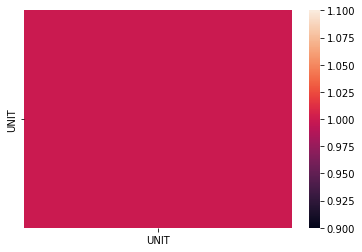

In [127]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns)

# Pairplot

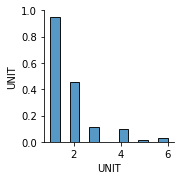

In [128]:
sns.pairplot(df1)

# Distinct plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


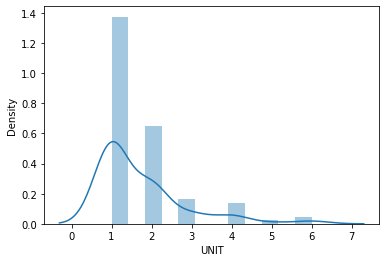

In [129]:
sns.distplot(df1['UNIT'])

In [130]:
df1['DESCRIPTION'].value_counts()

Beef         30
Prawns       28
Fish         12
Mango        10
Lemon         7
King Fish     7
Dryfruits     5
Dates         3
Kadumanga     1
Name: DESCRIPTION, dtype: int64

# Piechart for Food_Description

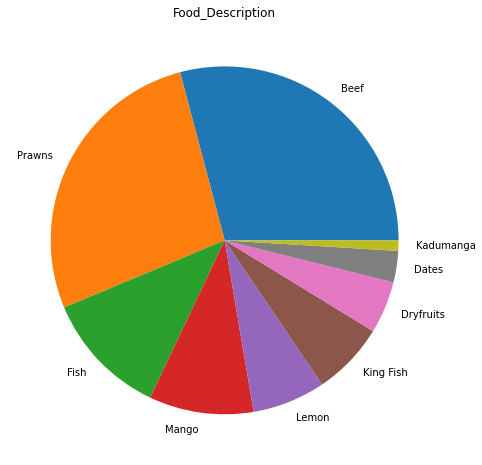

In [1]:
from matplotlib.font_manager import Number
from matplotlib import pyplot as plt
import numpy as np
food_items= ['Beef', 'Prawns', 'Fish','Mango', 'Lemon', 'King Fish','Dryfruits','Dates','Kadumanga']
Number = [30,28,12,10,7,7,5,3,1]
fig = plt.figure(figsize =(11, 8))
plt.pie(Number, labels = food_items)
# show plot
plt.title("Food_Description")
plt.show()

# Bar plot for Food Description

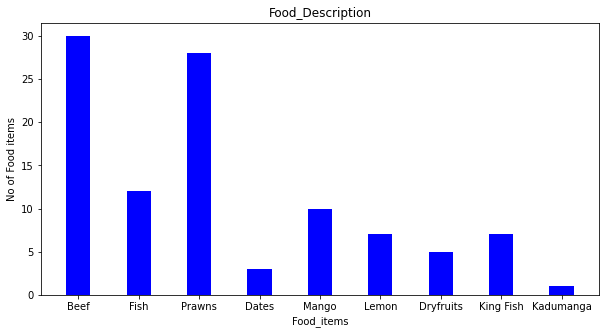

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
df2=Counter(df1['DESCRIPTION'])
df3=dict(df2)
food_items = list(df3.keys())
values = list(df3.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(food_items, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Food_items")
plt.ylabel("No of Food items")
plt.title("Food_Description")
plt.show()

# 5.Creating a final report for this assignment using pandas-profiling

In [133]:
profile=ProfileReport(df1)

In [134]:
profile.to_file(output_file ='FINAL_REPORT_ANALYSIS.html')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]